In [2]:
import numpy as np
import pandas as pd
import os
import os.path as op
import matplotlib.pyplot as plt
import openneuro
from mne_bids import (BIDSPath, read_raw_bids, print_dir_tree, make_report, get_entity_vals)
import scipy
from mne.datasets import sample
import seaborn as sns
import mne
from bids_extract import bidsExtract

bids_path = r"C:\Users\eyala\Documents\GitHub\brainProj\ds003688"
dataset = "ds003688"
subject = "02"

c:\Users\eviat\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\eviat\mne_data\ds003688
Extracting parameters from C:\Users\eviat\mne_data\ds003688\sub-02\ses-iemu\ieeg\sub-02_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Reading events from C:\Users\eviat\mne_data\ds003688\sub-02\ses-iemu\ieeg\sub-02_ses-iemu_task-film_run-1_events.tsv.
Reading channel info from C:\Users\eviat\mne_data\ds003688\sub-02\ses-iemu\ieeg\sub-02_ses-iemu_task-film_acq-clinical_run-1_channels.tsv.
Reading electrode coords from C:\Users\eviat\mne_data\ds003688\sub-02\ses-iemu\ieeg\sub-02_ses-iemu_acq-clinical_electrodes.tsv.


c:\Users\eviat\Desktop\brainProj\bids_extract.py:31: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  return mne_bids.read_raw_bids(bids_path)
c:\Users\eviat\Desktop\brainProj\bids_extract.py:31: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  return mne_bids.read_raw_bids(bids_path)
c:\Users\eviat\Desktop\brainProj\bids_extract.py:31: RuntimeWarning: The unit for channel(s) AH+ has changed from V to NA.
  return mne_bids.read_raw_bids(bids_path)


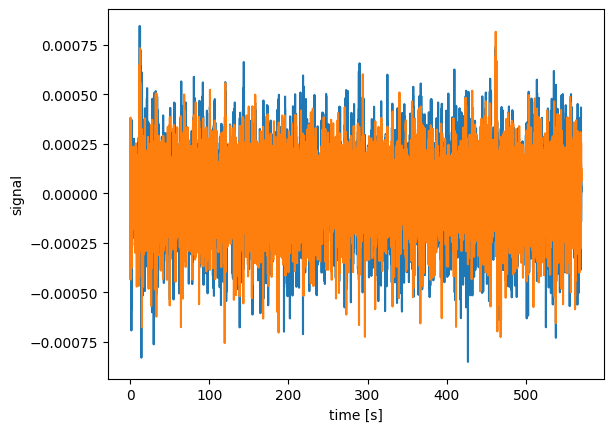

In [7]:
# Download one subject's data from each dataset
bids_root = op.join(op.dirname(sample.data_path()), dataset)
print(bids_root)
test = bidsExtract(bids_root)
raw = test.get_raw()
#raw.plot() # plot the raw data
#plt.show()
#print(raw.info)
raw_selection = raw["F01", 0:]
x1=raw_selection[1]
y1=raw_selection[0].T
    
raw_selection = raw["F21", 0:]
x2=raw_selection[1]
y2=raw_selection[0].T
    
#plot the data
plt.plot(x1, y1)
plt.xlabel('time [s]')
plt.ylabel('signal')
#plt.show()
plt.plot(x2, y2)
plt.xlabel('time [s]')
plt.ylabel('signal')
plt.show()

creating coherence between two signals


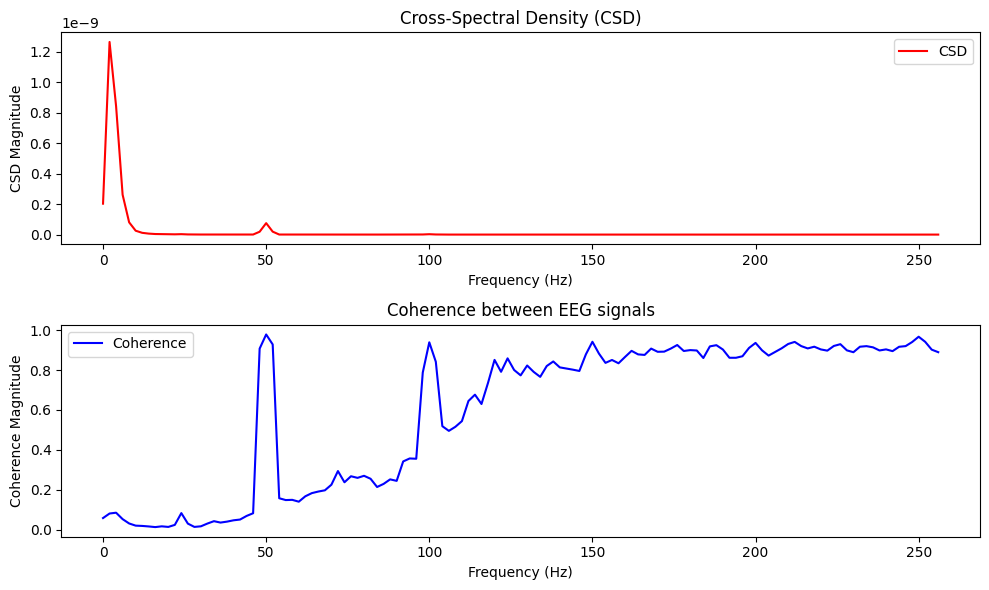

In [6]:
import numpy as np
from scipy.signal import csd, coherence
import matplotlib.pyplot as plt

# Assuming x1, y1, x2, y2 are your EEG signals
# Make sure that x1, x2 are the same for both signals


# Compute Cross-Spectral Density (CSD)
frequencies, csd_values = csd(y1.flatten(), y2.flatten(), fs=512.0, nperseg=256)

# Compute Coherence
frequencies, coherence_values = coherence(y1.flatten(), y2.flatten(), fs=512.0, nperseg=256)

# Plot Coherence
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(frequencies, np.abs(csd_values), 'r', label='CSD')
plt.title('Cross-Spectral Density (CSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('CSD Magnitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(frequencies, coherence_values, 'b', label='Coherence')
plt.title('Coherence between EEG signals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence Magnitude')
plt.legend()

plt.tight_layout()
plt.show()
